<a href="https://colab.research.google.com/github/Mejia2003/InfoII/blob/main/codigodelmodelo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.signal import resample
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.io import loadmat

class Doctor:
    def __init__(self, nombre, usuario, contraseña=None):
        self.nombre = nombre
        self.usuario = usuario
        self.contraseña = contraseña

class Paciente:
    def __init__(self, nombre, apellido, edad, genero, identificacion, fecha):
        self.nombre = nombre
        self.apellido = apellido
        self.edad = edad
        self.genero = genero
        self.identificacion = identificacion
        self.fecha = fecha

class SistemaGestionModelo:
    def __init__(self):
        self.doctores = {}
        self.pacientes = {}


    # Funcion guardar_usuario_doctor. Es necesario un condicional para verificar si el usuario del doctor se encuentra dentro de nuestro diccionario
    # Si el usuario ya existe, se lanza un error ValueError indicando que el usuario ya está registrado.
    # La razón de utilizar raise en este contexto es para manejar el caso en el que se intente agregar un usuario que ya está en el diccionario datos_ingreso_doctor.
    # Si el usuario no existe, se agrega al diccionario datos_ingreso_doctor con su correspondiente contraseña

    def guardar_usuario_doctor(self, nombre, usuario):
        if usuario in self.doctores:
            raise ValueError("El usuario ya existe.")
        self.doctores[usuario] = Doctor(nombre, usuario)


    def guardar_contraseña_doctor(self, usuario, contraseña):
        if usuariO not in self.doctores:
            raise ValueError("El usuario no existe.")
        if not contraseña:
            raise ValueError("La contraseña no puede estar vacía.")
        self.doctores[usuario].contraseña = contraseña


    def guardar_paciente(self, nombre, apellido, edad, genero, identificacion, fecha):
        if identificacion in self.pacientes:
            raise ValueError("El paciente ya existe.")
        self.pacientes[identificacion] = Paciente(nombre, apellido, edad, genero, identificacion, fecha)

    def cargar_ekg(self, ruta_imagen):
        imagen = cv2.imread("C:\Users\nidam\Downloads\EKG" cv2.IMREAD_GRAYSCALE)
        if imagen is None:
            raise ValueError("No se pudo cargar la imagen.")
        return imagen

    def diagnosticar_bloqueo(self, imagen_ekg):
        # Procesar la imagen para detectar el bloqueo en el segmento PR
        kernel = np.ones((5,5), np.uint8)
        dilatada = cv2.dilate(imagen_ekg, kernel, iterations=1)
        # Esta es una implementación simplificada. Necesitaría lógica específica para detectar bloqueos.
        return "Diagnóstico del tipo de bloqueo basado en el segmento PR"

    def variar_amplitud_ekg(self, señal, factor_amplitud):
        return [punto * factor_amplitud for punto in señal]

    def variar_frec_ekg(self, señal, factor_frecuencia):
        num_muestras = int(len(señal) * factor_frecuencia)
        señal_resampleada = resample(señal, num_muestras)
        return señal_resampleada

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-12-aa3944b55d1a>, line 52)

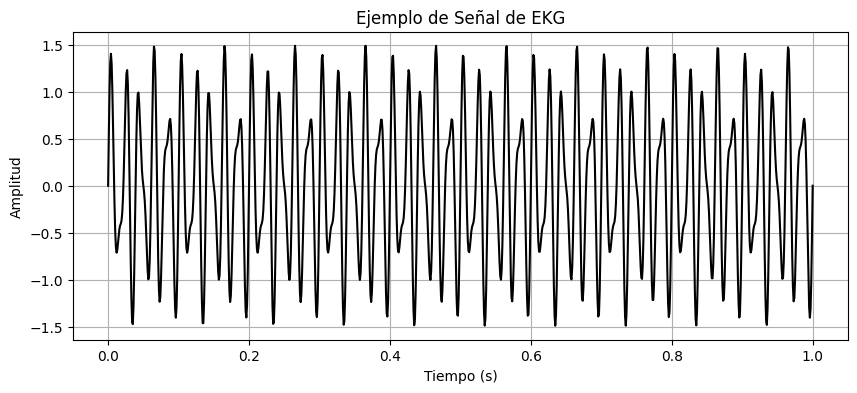

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Crear una señal de ejemplo de un ciclo de EKG
fs = 1000  # Frecuencia de muestreo en Hz
t = np.linspace(0, 1, fs)  # Tiempo de 0 a 1 segundo
f1, f2 = 50, 80  # Frecuencias de las ondas P y R respectivamente
ecg_signal = np.sin(2*np.pi*f1*t) + 0.5*np.sin(2*np.pi*f2*t)  # Señal de EKG simulada

# Crear una figura y graficar la señal
plt.figure(figsize=(10, 4))
plt.plot(t, ecg_signal, color='black')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Ejemplo de Señal de EKG')
plt.grid(True)
plt.show()


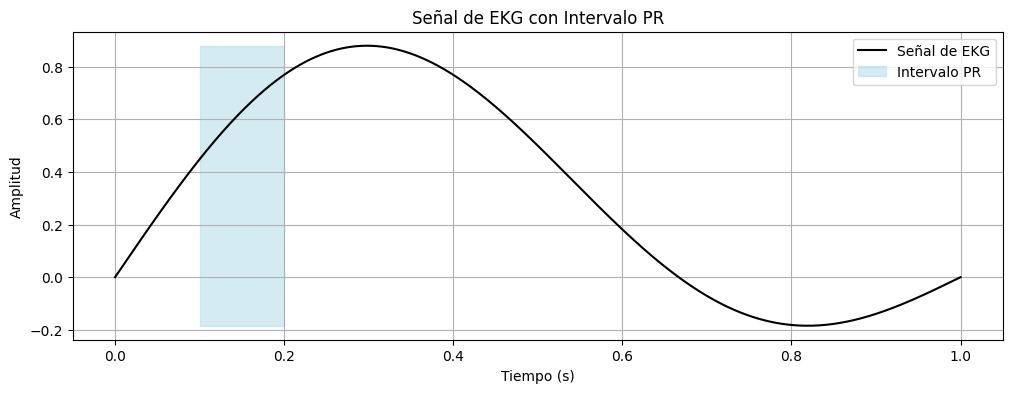

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generar una señal de EKG simulada
fs = 1000  # Frecuencia de muestreo en Hz
t = np.linspace(0, 1, fs)  # Tiempo de 0 a 1 segundo
f_p = 1  # Frecuencia de la onda P en Hz
f_qrs = 0.5  # Frecuencia del complejo QRS en Hz
ecg_signal = (
    np.sin(2*np.pi*f_p*t) +  # Onda P
    np.sin(2*np.pi*f_qrs*t)  # Complejo QRS
) * 0.5  # Amplitud reducida para una mejor visualización

# Identificar el intervalo PR
# En este ejemplo, el intervalo PR comienza aproximadamente en t=0.1s y termina en t=0.2s
pr_interval_start = 0.1
pr_interval_end = 0.2

# Graficar la señal de EKG
plt.figure(figsize=(12, 4))
plt.plot(t, ecg_signal, color='black', label='Señal de EKG')
plt.fill_betweenx(
    y=[np.min(ecg_signal), np.max(ecg_signal)],
    x1=pr_interval_start,
    x2=pr_interval_end,
    color='lightblue',
    alpha=0.5,
    label='Intervalo PR'
)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal de EKG con Intervalo PR')
plt.legend()
plt.grid(True)
plt.show()

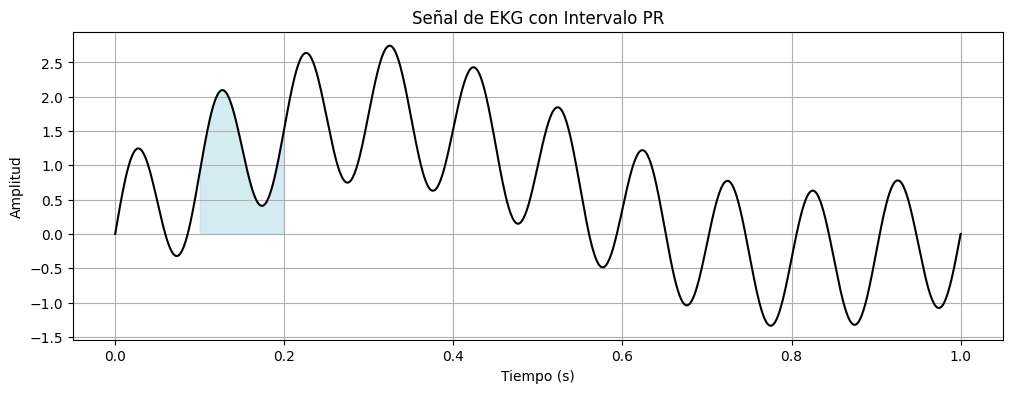

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Frecuencia de muestreo en Hz
fs = 1000

# Tiempo de muestreo de 1 segundo
t = np.linspace(0, 1, fs)

# Generar una señal de EKG simulada
ecg_signal = (
    np.sin(2 * np.pi * 1 * t) +          # Onda P
    np.sin(2 * np.pi * 10 * t) +         # Complejo QRS
    np.sin(2 * np.pi * 0.5 * t)          # Segmento PR
)

# Definir el intervalo PR
pr_interval_start = int(0.1 * fs)
pr_interval_end = int(0.2 * fs)

# Graficar la señal de EKG
plt.figure(figsize=(12, 4))
plt.plot(t, ecg_signal, color='black')
plt.fill_between(t[pr_interval_start:pr_interval_end], ecg_signal[pr_interval_start:pr_interval_end], color='lightblue', alpha=0.5)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal de EKG con Intervalo PR')
plt.grid(True)
plt.show()

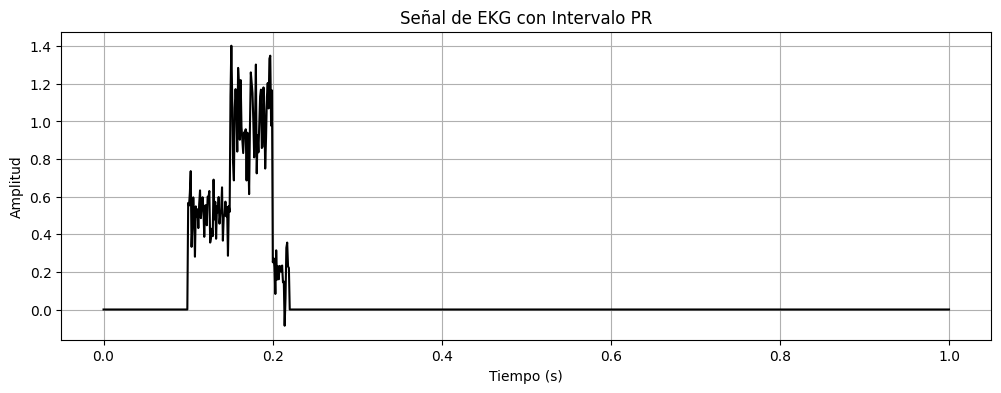

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Frecuencia de muestreo en Hz
fs = 1000

# Tiempo de muestreo de 1 segundo
t = np.linspace(0, 1, fs)

# Generar una señal de EKG simulada
ecg_signal = np.zeros_like(t)

# Crear una señal de onda P aleatoria
p_wave_start = int(0.1 * fs)
p_wave_end = int(0.18 * fs)
ecg_signal[p_wave_start:p_wave_end] = np.random.normal(loc=0.5, scale=0.1, size=p_wave_end-p_wave_start)

# Crear una señal de complejo QRS aleatoria
qrs_start = int(0.15 * fs)
qrs_end = int(0.2 * fs)
ecg_signal[qrs_start:qrs_end] = np.random.normal(loc=1.0, scale=0.2, size=qrs_end-qrs_start)

# Crear una señal de segmento PR aleatoria
pr_start = int(0.2 * fs)
pr_end = int(0.22 * fs)
ecg_signal[pr_start:pr_end] = np.random.normal(loc=0.2, scale=0.1, size=pr_end-pr_start)

# Graficar la señal de EKG
plt.figure(figsize=(12, 4))
plt.plot(t, ecg_signal, color='black')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal de EKG con Intervalo PR')
plt.grid(True)
plt.show()

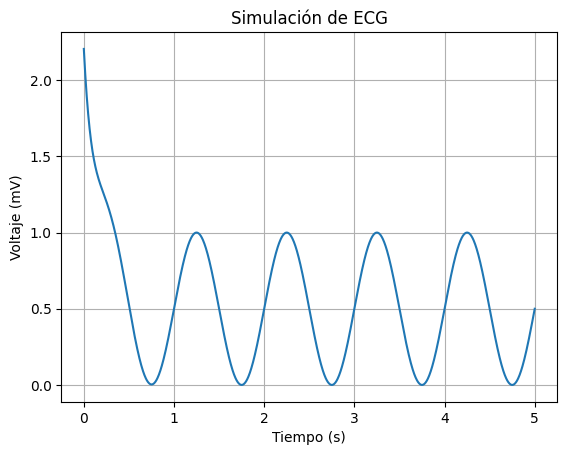

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros de ECG
frecuencia_cardiaca = 60  # BPM
amplitud_onda_P = 0.1  # mV
amplitud_complejo_QRS = 1  # mV
amplitud_onda_T = 0.5  # mV
duracion_onda_P = 0.08  # s
duracion_complejo_QRS = 0.06  # s
duracion_onda_T = 0.12  # s
tiempo_total = 5  # s
frecuencia_muestreo = 250  # Hz

# Generar tiempo
tiempo = np.linspace(0, tiempo_total, frecuencia_muestreo * tiempo_total)

# Generar onda P
onda_P = amplitud_onda_P * np.exp(-tiempo / duracion_onda_P)

# Generar complejo QRS
complejo_QRS = amplitud_complejo_QRS * (np.sin(2*np.pi*tiempo*frecuencia_cardiaca/60) + 1) / 2

# Generar onda T
onda_T = amplitud_onda_T * np.exp(-(tiempo - duracion_complejo_QRS - duracion_onda_P) / duracion_onda_T)

# Generar señal de ECG
ecg = onda_P + complejo_QRS + onda_T

# Visualizar señal de ECG
plt.plot(tiempo, ecg)
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (mV)')
plt.title('Simulación de ECG')
plt.grid(True)
plt.show()

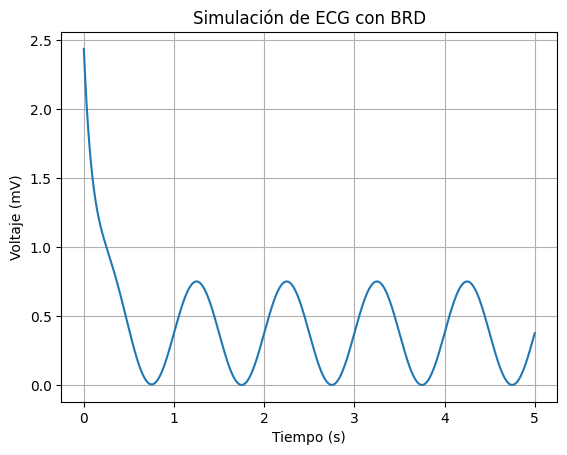

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros de ECG
frecuencia_cardiaca = 60  # BPM
amplitud_onda_P = 0.1  # mV
amplitud_complejo_QRS = 1  # mV
amplitud_onda_T = 0.5  # mV
duracion_onda_P = 0.08  # s
duracion_complejo_QRS = 0.12  # s
duracion_onda_T = 0.12  # s
tiempo_total = 5  # s
frecuencia_muestreo = 250  # Hz

# Generar tiempo
tiempo = np.linspace(0, tiempo_total, frecuencia_muestreo * tiempo_total)

# Generar onda P
onda_P = amplitud_onda_P * np.exp(-tiempo / duracion_onda_P)

# Generar complejo QRS
complejo_QRS = amplitud_complejo_QRS * (np.sin(2*np.pi*tiempo*frecuencia_cardiaca/60) + 1) / 2

# Generar onda T
onda_T = amplitud_onda_T * np.exp(-(tiempo - duracion_complejo_QRS - duracion_onda_P) / duracion_onda_T)

# Generar señal de ECG
ecg = onda_P + complejo_QRS + onda_T

# Modificar señal para simular BRD
ecg[ecg < 0] = -ecg[ecg < 0] * 0.5  # Invertir onda QRS en derivaciones I, aVL y F
ecg[ecg > 0] = ecg[ecg > 0] * 0.75  # Disminuir amplitud de onda QRS en derivaciones III, aVR y VF

# Visualizar señal de ECG
plt.plot(tiempo, ecg)
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (mV)')
plt.title('Simulación de ECG con BRD')
plt.grid(True)
plt.show()